### Import libs

In [154]:
import pandas as pd
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np

### Load envs

In [167]:
load_dotenv('../.env') 
OMDB_API_KEY = os.getenv('OMDB_API_KEY')
REVENUES_PER_DAY = os.getenv('REVENUES_CSV_PATH')

### Check data inputs

In [168]:
# API Key
if OMDB_API_KEY:
    print("API found and read successfully")
else:
    print("API key not found. Please, check .env file")

# CSV file
try:
    df = pd.read_csv(REVENUES_PER_DAY)
    print("CSV file read successfully. DataFrame head is:")
    display(df.head())
except FileNotFoundError as e:
    print(f"File not found error - {e}")
except Exception as e:
    print(f"Exception - {e}")

API found and read successfully
CSV file read successfully. DataFrame head is:


,id,date,title,revenue,theaters,distributor
0,8b19ad43-3a7e-b14b-49e9-1f7a0eb1568e,2004-09-20,Sky Captain and the World of Tomorrow,925482,3170.0,Paramount Pictures
1,481fc700-fcdd-1919-c53c-09fcd423a596,2004-09-20,Resident Evil: Apocalypse,643680,3284.0,Screen Gems
2,06719cc2-c05e-8c0b-56b6-b8b13e056509,2004-09-20,Mr 3000,425375,2736.0,Walt Disney Studios Motion Pictures
3,3be8e4a8-2716-00be-80be-eb342ba3cbe7,2004-09-20,Wimbledon,416970,2034.0,Universal Pictures
4,c5f26b59-6a64-ae8e-8f58-7cefb09eadfe,2004-09-20,Cellular,412000,2749.0,New Line Cinema


### Overall information about revenues_per_day DataFrame

In [56]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337818 entries, 0 to 337817
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           337818 non-null  object 
 1   date         337818 non-null  object 
 2   title        337818 non-null  object 
 3   revenue      337818 non-null  int64  
 4   theaters     337657 non-null  float64
 5   distributor  337593 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.5+ MB


In [ ]:
# Size looks good for pandas usage. 

In [23]:
df.describe()

,revenue,theaters
count,3.378180e+05,337657.000000
mean,6.071642e+05,848.611597
std,2.323203e+06,1137.442240
min,0.000000e+00,1.000000
25%,6.592000e+03,45.000000
50%,4.077500e+04,226.000000
75%,3.029205e+05,1402.000000
max,1.574616e+08,4931.000000


In [24]:
df.describe(include='object')

,id,date,title,distributor
count,337818,337818,337818,337593
unique,337818,8455,6545,362
top,8b19ad43-3a7e-b14b-49e9-1f7a0eb1568e,2018-05-28,Deep Sea,Warner Bros.
freq,1,103,1114,41374


In [25]:
df.nunique()

id             337818
date             8455
title            6545
revenue        179113
theaters         4114
distributor       362
dtype: int64

In [ ]:
df['distributor'].value_counts()

distributor
Warner Bros.                           41374
Twentieth Century Fox                  28529
Universal Pictures                     27273
Walt Disney Studios Motion Pictures    18283
Paramount Pictures                     18206
                                       ...  
Utopia                                     1
Madman Entertainment                       1
Fox Trail Productions                      1
Flyhigh Cinemas                            1
Artsploitation Films                       1
Name: count, Length: 362, dtype: int64

In [87]:
df[
    df['distributor'] == '-'
]['distributor'].count()

np.int64(7419)

In [53]:
df[
    df['distributor'].isnull()
].head()

,id,date,title,revenue,theaters,distributor
1040,e914d1b9-c832-57da-83e9-34fb026df8c1,2015-11-13,Paranoid Girls,23,1.0,NaN
1639,c9bf1178-6bc6-0d22-331b-485eced8fd15,2014-08-04,As It Is in Heaven,80,1.0,NaN
2440,0c03e2b1-795b-ad59-c597-5bbb8839fd41,2009-09-22,The Big Gay Musical,644,1.0,NaN
6215,6528a7e9-62d7-f9e5-d659-89d541d20a86,2009-09-24,The Big Gay Musical,426,1.0,NaN
8041,188c56af-2667-f162-e44c-2d86c5dd8446,2009-03-05,Box Elder,380,1.0,NaN


In [83]:
# Movies with the longest run
df['title'].value_counts().head(3)

title
Deep Sea            1114
Born to Be Wild      822
Under the Sea 3D     695
Name: count, dtype: int64

### Revenues data visualization

Initial df count - 337818
Processed df count - 337818


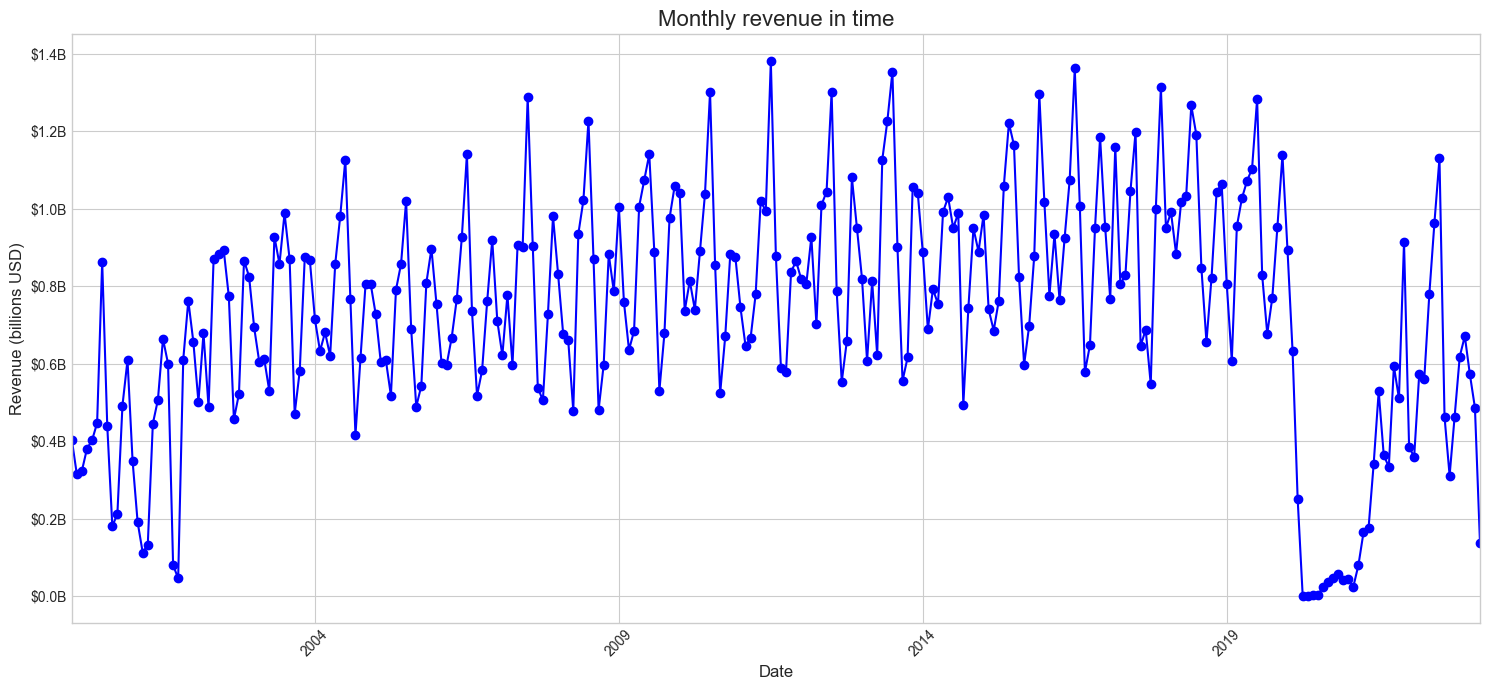

In [153]:

# Preprocess date column
print(f"Initial df count - {df['id'].count()}")

#Init copy of the DataFrame
df_revenue_time_revenue = df

# Change type of date column and removes all null values
df_revenue_time_revenue['date'] = pd.to_datetime(df_revenue_time_revenue['date'], errors='coerce')
df_revenue_time_revenue = df_revenue_time_revenue.dropna(subset=['date'])
df_revenue_time_revenue = df_revenue_time_revenue.set_index('date')

print(f"Processed df count - {df_revenue_time_revenue['id'].count()}")

# Aggregating and summarizing monthly revenue
monthly_revenue = df_revenue_time_revenue['revenue'].resample('ME').sum()

# Set plot style and size
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

# Plotting graph
monthly_revenue.plot(kind='line', ax=ax, color='blue', marker='o', linestyle='-')

# Formatting Y axis to show values in billions
ax.yaxis.set_major_formatter(lambda x, pos: f'${x/1e9:.1f}B')


# Formatting labels and layout
ax.set_title('Monthly revenue in time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenue (billions USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Overall information about OMDB DataFrame

In [90]:
df.head()

,id,date,title,revenue,theaters,distributor
0,8b19ad43-3a7e-b14b-49e9-1f7a0eb1568e,2004-09-20,Sky Captain and the World of Tomorrow,925482,3170.0,Paramount Pictures
1,481fc700-fcdd-1919-c53c-09fcd423a596,2004-09-20,Resident Evil: Apocalypse,643680,3284.0,Screen Gems
2,06719cc2-c05e-8c0b-56b6-b8b13e056509,2004-09-20,Mr 3000,425375,2736.0,Walt Disney Studios Motion Pictures
3,3be8e4a8-2716-00be-80be-eb342ba3cbe7,2004-09-20,Wimbledon,416970,2034.0,Universal Pictures
4,c5f26b59-6a64-ae8e-8f58-7cefb09eadfe,2004-09-20,Cellular,412000,2749.0,New Line Cinema


In [111]:
base_url = f'http://www.omdbapi.com/?apikey={OMDB_API_KEY}&'
movie_title = "Resident Evil: Apocalypse"

full_url = f"{base_url}&t={movie_title}"

In [119]:
def _test_movie_api(full_url: str) -> dict:
    try:
        response = requests.get(full_url)
        
        response.raise_for_status() 
        
        data = response.json()
        
        if data.get('Response') == 'True':
            return data
        else:
            print(f"Error during API request: {data.get('Error')}")

    except requests.exceptions.RequestException as e:
        print(f"Error during API connection: {e}")

In [ ]:
if _test_movie_api(full_url)['Title'] == movie_title:
    print("API connection works")

API connection works


### Top 10 distributors in terms of revenue

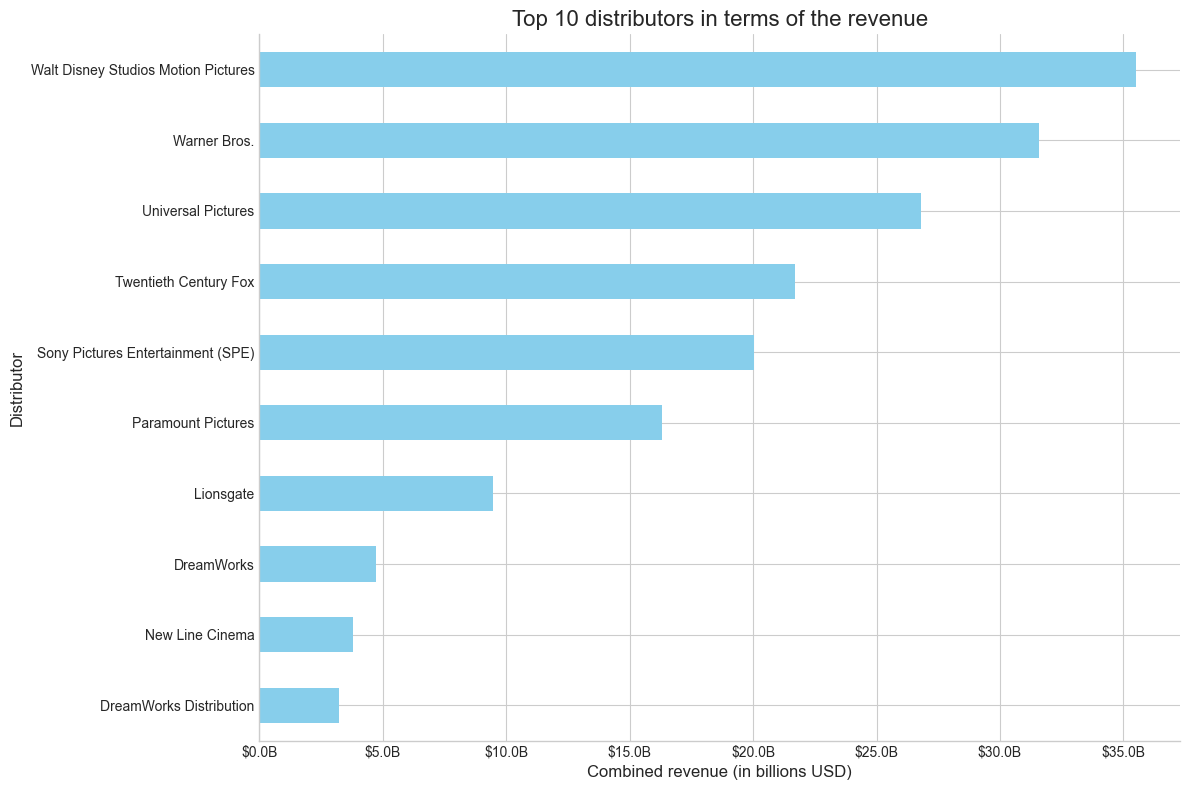

In [147]:
#Init copy of the orignall DataFrame
df_distributors = df

# Fix '-' values and drop nulls
df_distributors['distributor'] = df_distributors['distributor'].replace('-', np.nan)
df_cleaned = df_distributors.dropna(subset=['distributor'])

# Grouping data by distributor and sum revenue
distributor_revenue = df_cleaned.groupby('distributor')['revenue'].sum()

# SSelecting top 10
top_10_distributors = distributor_revenue.sort_values(ascending=False).head(10)

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
top_10_distributors.sort_values(ascending=True).plot(kind='barh', ax=ax, color='skyblue')

# Formatting
ax.set_title('Top 10 distributors in terms of the revenue', fontsize=16)
ax.set_xlabel('Combined revenue (in billions USD)', fontsize=12)
ax.set_ylabel('Distributor', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1e9:.1f}B') # Setting to billions
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

### Top movies in terms of revenue

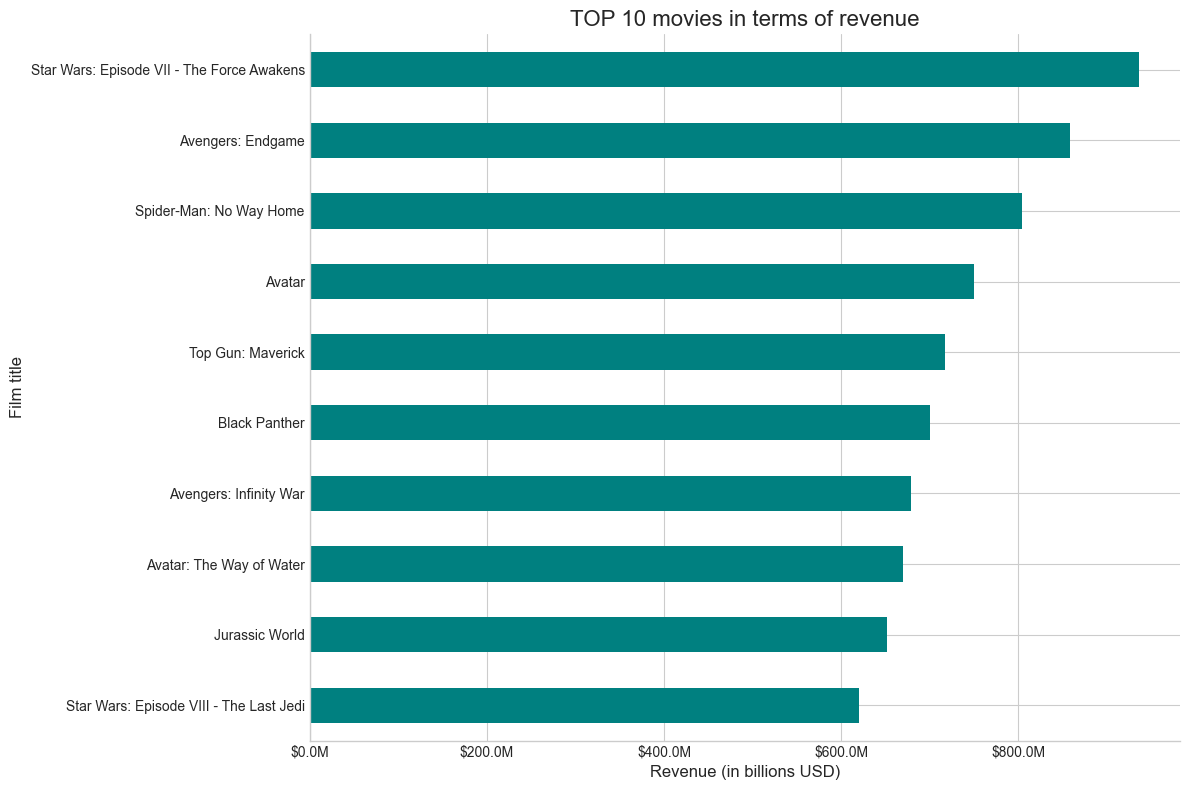

In [148]:

df_top_movies = df

# Group By title and sum revenue
movie_revenue = df.groupby('title')['revenue'].sum()

# Sort values to get top 10
top_10_movies = movie_revenue.sort_values(ascending=False).head(10)

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
top_10_movies.sort_values(ascending=True).plot(kind='barh', ax=ax, color='teal')

# Formatting
ax.set_title('TOP 10 movies in terms of revenue', fontsize=16)
ax.set_xlabel('Revenue (in billions USD)', fontsize=12)
ax.set_ylabel('Film title', fontsize=12)
ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1e6:.1f}M') # setting to billions
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

### Data Exploration Summary

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337818 entries, 0 to 337817
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           337818 non-null  object 
 1   date         337818 non-null  object 
 2   title        337818 non-null  object 
 3   revenue      337818 non-null  int64  
 4   theaters     337657 non-null  float64
 5   distributor  337593 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.5+ MB


In [ ]:
"""
This analysis was based only on the data read from the revenues_per_day.csv file, which was not modified in any way (apart for date column for one graph).

revenues_per_day DataFrame structure:
- id: A unique identifier for each record in the dataset.
- date: The date for which the revenue was recorded in YYYY-MM-DD format.
- title: The title of the movie.
- revenue: The daily gross revenue (in US dollars) generated by the movie on a given day
- theaters: The number of theaters in which the movie was screened on a given day.
- distributor: The name of the movie's distributor.


The DataFrame has 337,818 rows with a unique ID column (a combination of the Title and Date columns). The number of unique movie titles is 6,545.
Aside from standard transformation actions (e.g., string cleaning, removing duplicates), null values in the distributor and theaters columns need to be handled in the future.
The distributor column has hidden null values in the form of '-'.
Also, it's hard to confirm if distributors such as "DreamWorks" and "DreamWorks Distribution" should be treated as separate entries or if the data should be cleansed in that case.
For the purpose of this exercise, I will treat them as different entry values.

Of course, in the ETL process, a different schema needs to be enforced on read (e.g., converting the date column from Dtype object to datetime64).

Regarding monthly revenue, these are the main observations:
- A huge drop during the COVID-19 lockdowns.
- Revenue grew steadily until COVID-19.
- There is seasonality in the revenue.

Regarding the top 10 distributors:
- The "Big 3" earn more than the rest.
- "DreamWorks" & "DreamWorks Distribution" requires cleaning (uncertain).

Regarding the top 10 movies in terms of revenue:
-Top-earning movies come from Disney.
- Franchises earn the most.

Regarding the API, the connection works fine.
"""

'\nThis analysis was based only on the data read from the revenues_per_day.csv file, which was not modified in any way (apart for date column for one graph).\n\nThe DataFrame has 337,818 rows with a unique ID column (a combination of the Title and Date columns). The number of unique movie titles is 6,545.\nAside from standard transformation actions (e.g., string cleaning, removing duplicates), null values in the distributor and theaters columns need to be handled in the future. The distributor column has hidden null values in the form of \'-\'.\nAlso, it\'s hard to confirm if distributors such as "DreamWorks" and "DreamWorks Distribution" should be treated as separate entries or if the data should be cleansed in that case.\nFor the purpose of this exercise, I will treat them as different entry values.\n\nOf course, in the ETL process, a different schema needs to be enforced on read (e.g., converting the date column from Dtype object to datetime64).\n\nRegarding monthly revenue, these a